# Prepare data

In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt 

Read raw data from csv

In [12]:
raw_dataset = pd.read_csv('datasets/pokemon.csv', index_col='id')
X_raw = raw_dataset.drop(["MOS", "user_id"], 1)
y = raw_dataset['MOS']

/tmp/ipykernel_2208/2969924520.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_raw = raw_dataset.drop(["MOS", "user_id"], 1)


Select features according to the k highest scores. </br>
The **f_regression** score function will rank features in the same order if all the features are positively correlated with the target.

In [3]:
def select_features(X: pd.DataFrame, y: pd.Series, k=10):
	selector = SelectKBest(score_func=f_regression, k=k)
	selector.fit(X, y)
	return X[X.columns[selector.get_support(indices=True)]], selector

Split dataset into train and test subsets

In [14]:
X, fs = select_features(X_raw, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Display feature's scores

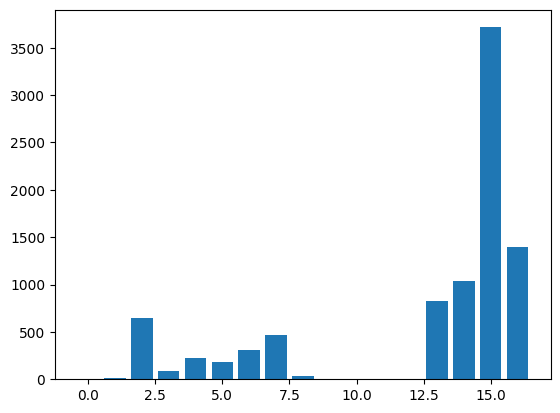

In [15]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# Machine Learning

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

Declare some machine learning models with default params

In [17]:
linear = LinearRegression()
svr = SVR()
random_forest = RandomForestRegressor()
bagging = BaggingRegressor()
ada_boost = AdaBoostRegressor()
gradient_boost = GradientBoostingRegressor()
models = [('linear', linear), ('svr', svr), ('random_forest',
                                                      random_forest), ('bagging', bagging), ('ada_boost', ada_boost), ('gradient_boost', gradient_boost)]


Training all models

In [18]:
for name, model in models:
    model.fit(X_train, y_train)

Predict and compute **mean_squared_error** of each model

In [19]:
preds = list(map(lambda model : model[1].predict(X_test), models))
ml_mses = list(map(lambda model, pred : (model[0], mean_squared_error(y_test, pred)), models, preds))

# LSTM

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.metrics import MeanSquaredError

2022-11-21 15:30:52.570876: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-21 15:30:52.830916: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-21 15:30:52.927180: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-21 15:30:53.985526: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

Build **LSTM** model

In [21]:
def build_model(number_of_feature):
    model = Sequential()
    model.add(LSTM(128, return_sequences=False,
              input_shape=(number_of_feature, 1)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64))
    model.add(Dropout(0.2))
    model.add(Dense(32))
    model.add(Dropout(0.2))
    # model.add(LSTM(50, return_sequences=False))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam',
                  loss='mse', metrics=[MeanSquaredError()])
    return model

In [22]:
lstm = build_model(10)

2022-11-21 15:30:54.997014: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-21 15:30:55.028151: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-21 15:30:55.028503: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-21 15:30:55.029534: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow 

Training model

In [23]:
lstm.fit(X_train, y_train, validation_split=0.05,
         batch_size=128, epochs=100, shuffle=True)


Epoch 1/100


2022-11-21 15:30:58.718187: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


 1/10 [==>...........................] - ETA: 30s - loss: 14.6962 - mean_squared_error: 14.6962

2022-11-21 15:30:59.836526: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


10/10 [==============================] - 4s 50ms/step - loss: 5.0980 - mean_squared_error: 5.0980 - val_loss: 0.8928 - val_mean_squared_error: 0.8928
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 1.5244 - mean_squared_error: 1.5244 - val_loss: 0.8135 - val_mean_squared_error: 0.8135
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 1.2918 - mean_squared_error: 1.2918 - val_loss: 0.8642 - val_mean_squared_error: 0.8642
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 1.2393 - mean_squared_error: 1.2393 - val_loss: 0.6537 - val_mean_squared_error: 0.6537
Epoch 5/100
10/10 [==============================] - 0s 12ms/step - loss: 0.9368 - mean_squared_error: 0.9368 - val_loss: 0.5770 - val_mean_squared_error: 0.5770
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 0.8300 - mean_squared_error: 0.8300 - val_loss: 0.5272 - val_mean_squared_error: 0.5272
Epoch 7/100
10/10 [=======================

Predict and compute **MSE**

In [24]:
lstm_pred = lstm.predict(X_test)
lstm_mse = mean_squared_error(y_test, lstm_pred)

10/10 [==============================] - 0s 3ms/step


Print all MSE

In [25]:
mses = ml_mses + [('lstm', lstm_mse)]
for name, mse in mses:
    print(name + ": ", mse)

linear:  0.2148742134290496
svr:  0.6824682737735548
random_forest:  0.231336569579288
bagging:  0.24919093851132687
ada_boost:  0.28935704847240407
gradient_boost:  0.21598538414403182
lstm:  0.2312630503901547
